In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q fake-useragent transformers==4.28.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.9 MB/s eta 0:00:00


In [ ]:
import requests
import json
import hashlib
import random
import string
from fake_useragent import UserAgent

class ChatCompletion:
    @classmethod
    def md5(self, text):
        return hashlib.md5(text.encode()).hexdigest()[::-1]

    @classmethod
    def get_api_key(self, user_agent):
        part1 = str(random.randint(0, 10**11))
        part2 = self.md5(user_agent+self.md5(user_agent+self.md5(user_agent+part1+"x")))
        return f"tryit-{part1}-{part2}"

    @classmethod
    def create(self, messages):
        user_agent = UserAgent().random
        api_key = self.get_api_key(user_agent)
        headers = {
          "api-key": api_key,
          "user-agent": user_agent
        }
        files = {
          "chat_style": (None, "chat"),
          "chatHistory": (None, json.dumps(messages))
        }

        r = requests.post("https://api.deepai.org/chat_response", headers=headers, files=files, stream=True)

        for chunk in r.iter_content(chunk_size=None):
            r.raise_for_status()
            yield chunk.decode()

class Completion:
    @classmethod
    def create(self, prompt):
        return ChatCompletion.create([
            {
                "role": "user", 
                "content": prompt
            }
        ])

In [ ]:
template = """Tolong benarkan kalimat dibawah ini menjadi judul produk yang menarik dan berikan deskripsi yang cocok serta jawab dengan menggunakan format 

Judul: Judul yang anda buat
==========
Deskripsi: Deskripsi yang anda buat 

"""

def generate_title_desc(text):
  messages = [
      {"role": "system", "content":  f'{template} {text}'},
  ]

  results = ""
  for chunk in ChatCompletion.create(messages):
      results += chunk

  print(results)

In [ ]:
from transformers import TFVisionEncoderDecoderModel, AutoImageProcessor, AutoTokenizer, VisionEncoderDecoderModel

In [ ]:
encoder_pretrained = 'google/vit-base-patch16-224'
decoder_pretrained = 'indolem/indobert-base-uncased'
pretrained_model = '/content/drive/MyDrive/Capstone Project/vit_bert_elektronik'

image_processor = AutoImageProcessor.from_pretrained(encoder_pretrained)
tokenizer = AutoTokenizer.from_pretrained(decoder_pretrained)
model = VisionEncoderDecoderModel.from_pretrained(pretrained_model)

Saving 0b27753e152976f1cde90050d7cf44d1_tn-3577666828.jpeg to 0b27753e152976f1cde90050d7cf44d1_tn-3577666828 (2).jpeg





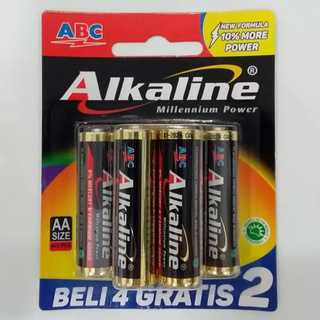


Judul: Baterai ABC Alkaline isi 6 pcs untuk Mainan dan Elektronik
Deskripsi: Baterai ABC Alkaline adalah baterai yang paling banyak digunakan untuk mainan dan elektronik. Baterai ini terdiri dari 6 pcs yang dapat digunakan untuk berbagai macam keperluan. Baterai ini memiliki daya tahan yang lama dan dapat diisi ulang untuk penggunaan yang lebih ekonomis. Cocok digunakan untuk remote kontrol, mainan, dan perangkat elektronik lainnya. Jangan khawatir kehabisan baterai, siapkan Baterai ABC Alkaline isi 6 pcs ini di rumahmu!



Bad Generation:
['baterai / battery / batere abc alkaline aaa isi 6 pcs isi 6 baterai baterei baterai batere batere mainan isi 4 cod baterai mainan baterai / baterai abc batere / batre batere isi 6pcs! isi 2 ( baterai baterai isi 1 ) isi isi isi baterai baterai isi baterai baterai baterai batre isi ulang', 'baterai / battery / batere abc alkaline aaa isi 6 pcs isi 6 baterai baterei baterai batere batere mainan isi 4 cod baterai mainan baterai / baterai abc batere /

In [ ]:
from google.colab import files
from PIL import Image

uploaded = files.upload()
filename = list(uploaded.keys())[0]

image = Image.open(filename).convert("RGB")

pixels = image_processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixels, num_return_sequences=3)
generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

print()
print()
print()
image.show()
print()
generate_title_desc(generated_text)

print()
print()
print()
print("Bad Generation:")
print(generated_text)